In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import ticker
from jupyterthemes import jtplot

In [2]:
import sys
if "C:\\Users\\elliott.good\\Desktop\\Python Scripts" not in sys.path:
    sys.path.insert(0, "C:\\Users\\elliott.good\\Desktop\\Python Scripts")
import SQL_query as query
jtplot.style("chesterish")

In [3]:
sql = '''
    SELECT lpn
        ,gtin
        ,job_id_hex
        ,EXTRACT(YEAR FROM created_at) as year
        ,EXTRACT(WEEK FROM created_at) as week
        ,DATE(created_at)
        ,updated_at
        ,campaign_id
        ,CASE WHEN order_type = 'single' THEN 0 ELSE 1 END as "multi"
        ,printed_sides
        ,shipment_token
    FROM LMS_lpn
    WHERE qc_result = 'pass'
    AND YEAR(created_at) >= YEAR(CURRENT_DATE) - 1
    AND created_at <= DATE(CURRENT_DATE - WEEKDAY(CURRENT_DATE) - 1)
'''

In [4]:
df = query.connect_to_Apollo(sql)

In [5]:
#df["X"] = df["order_type"].apply(lambda x: 0 if x == 'single' else 1)
df.tail()

,lpn,gtin,job_id_hex,year,week,DATE(created_at),updated_at,campaign_id,multi,printed_sides,shipment_token
3466267,B000803270,00766369095964,J629c6a,2018,23,2018-06-15,2018-06-18 01:23:06,2654320,0,1,ship_06f818703d
3466268,B000803271,00766369095964,J629d64,2018,23,2018-06-15,2018-06-18 02:18:33,2650154,0,2,ship_edea963adf
3466269,B000803272,00766369095964,J629c34,2018,23,2018-06-15,2018-06-18 02:16:44,2653621,0,2,ship_5e6a7f35c5
3466270,B000803273,00766369095964,J629cee,2018,23,2018-06-15,2018-06-18 01:24:40,2654321,0,1,ship_95bbfbcf0c
3466271,B000803274,00766369095964,J629cfd,2018,23,2018-06-15,2018-06-18 01:25:07,2654322,0,1,ship_68d2e042c3


# YTD Multi Proportion

In [16]:
# N = len(df)
# X = df["multi"].sum()

In [17]:
# p = X/N
# print("multi's:", X, "\ntotal:", N, "\nproportion: {0:.4f}".format(p))

multi's: 1186350 
total: 5930513 
proportion: 0.2000


In [ ]:
# confidence interval
# z = norm.ppf(.995)
# lower = p - (z*np.sqrt(p*(1-p)/N))
# upper = p + (z*np.sqrt(p*(1-p)/N))

In [ ]:
# print("99% confidence interval: ({0:.4f}, {1:.4f})".format(lower, upper))

# Multi Proportion Time Series

In [6]:
grouped = df[["year", "week", "multi"]].groupby(by=["year", "week"]).agg(["count", "sum"]).reset_index()
grouped["p"] = grouped["multi"]["sum"]/grouped["multi"]["count"]
grouped.tail(grouped[grouped["year"] == 2018]["week"].max())

year week  multi                p
               count    sum          
53  2018    1  47955   6875  0.143364
54  2018    2  51266   7348  0.143331
55  2018    3  50250   7599  0.151224
56  2018    4  52141   7782  0.149249
57  2018    5  43663   6169  0.141287
58  2018    6  59974   9716  0.162004
59  2018    7  56527   9917  0.175438
60  2018    8  65954  10822  0.164084
61  2018    9  62100  11729  0.188873
62  2018   10  58695   9346  0.159230
63  2018   11  57362   9830  0.171368
64  2018   12  54058   9843  0.182082
65  2018   13  54840   9907  0.180653
66  2018   14  48800   8918  0.182746
67  2018   15  50025   9843  0.196762
68  2018   16  50414  10445  0.207185
69  2018   17  42359   8466  0.199863
70  2018   18  50491   9508  0.188311
71  2018   19  41862   9125  0.217978
72  2018   20  40509   8335  0.205757
73  2018   21  38502   7961  0.206768
74  2018   22  49376  10491  0.212472
75  2018   23  46398   9327  0.201022

In [19]:
# function to show the yearly intervals
def yearMarkers(axis_obj, x_pos, **kwargs):
    axis_obj.axvline(x_pos, linestyle='--', color='w', alpha=.4, **kwargs)
years = np.arange(0,len(grouped), 51)

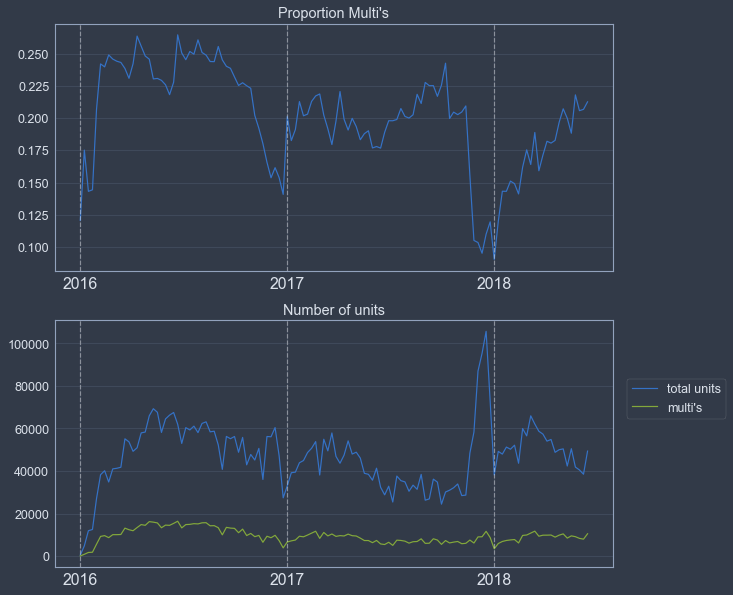

In [20]:
fig, [ax1, ax2] = plt.subplots(2)
# set figure width/height
fig.set_figwidth(10)
fig.set_figheight(10)

# first plot
ax1.plot(grouped["p"])
for year in years: # mark years
    yearMarkers(ax1, year)
ax1.title
ax1.set_title("Proportion Multi's")

# change tick labels to year
ax1.xaxis.set_major_locator(ticker.MultipleLocator(51))
ax1.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
labels = [item.get_text() for item in ax2.get_xticklabels()]
labels[1], labels[2], labels[3] = "2016", "2017", "2018"
ax1.set_xticklabels(labels, fontdict={'size': 'large'})

# second plot
ax2.plot(grouped["multi"]["count"], label='total units')
ax2.plot(grouped["multi"]["sum"], label="multi's")
for year in years: # mark years
    yearMarkers(ax2, year)
ax2.set_title("Number of units")
ax2.legend(loc=[1.025,.6])

# change tick labels to year
ax2.xaxis.set_major_locator(ticker.MultipleLocator(51))
ax2.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
labels = [item.get_text() for item in ax2.get_xticklabels()]
labels[1], labels[2], labels[3] = "2016", "2017", "2018"
ax2.set_xticklabels(labels, fontdict={'size': 'large'})

plt.show()